<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [30]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [21]:
boston_df = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

a. For the "Median value of owner-occupied homes" provide a boxplot

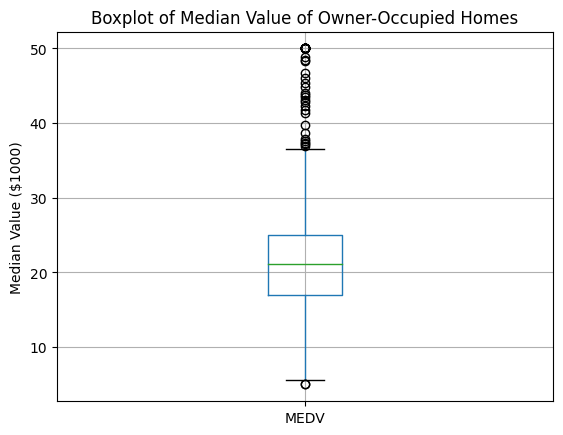

In [18]:
boston_df.boxplot(column='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000)')
plt.show()

b. Provide a  bar plot for the Charles river variable

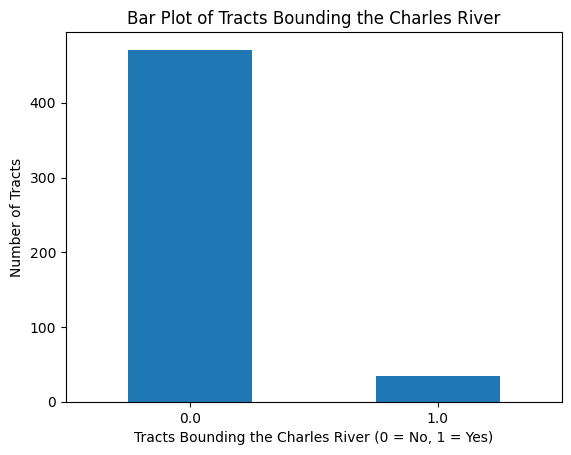

In [20]:
chas_counts = boston_df['CHAS'].value_counts()
chas_counts.plot(kind='bar')
plt.title('Bar Plot of Tracts Bounding the Charles River')
plt.xlabel('Tracts Bounding the Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Tracts')
plt.xticks(rotation=0)
plt.show()

c. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

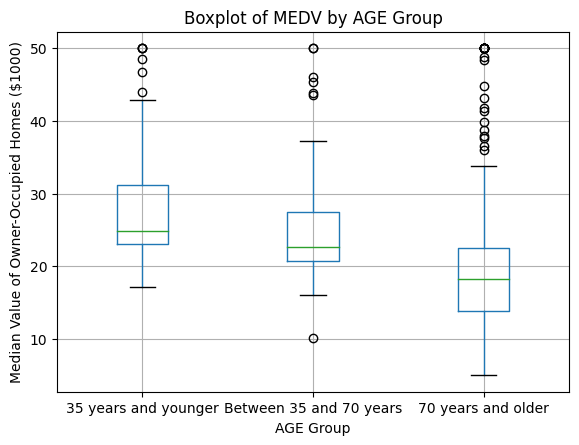

In [23]:
bins = [0, 35, 70, 101]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

boston_df.boxplot(column='MEDV', by='AGE_Group')
plt.title('Boxplot of MEDV by AGE Group')
plt.suptitle('')
plt.xlabel('AGE Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000)')
plt.show()

d. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

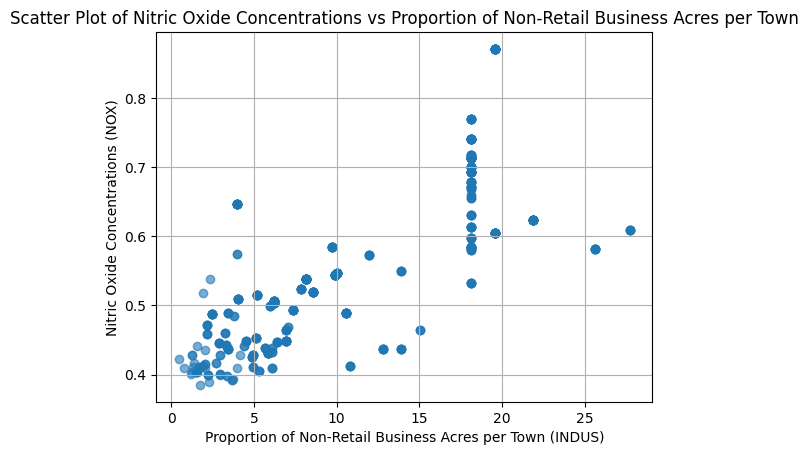

In [25]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.grid(True)
plt.show()

Observation: There is a positive association between non-retail business acres with nitric oxide concentrations.

d. Create a histogram for the pupil to teacher ratio variable

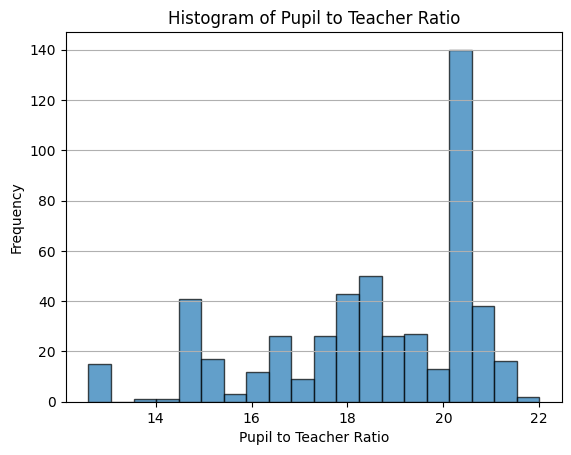

In [27]:
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

### Task A: T-test for independent samples.

**Is there a significant difference in median value of houses bounded by the Charles river or not?**

Hypothesis:

$H_0$: There is no significant difference in median value of houses bounded by the Charles river or not.

$H_1$: There is a significant difference in median value of houses bounded by the Charles river or not.

In [57]:
# Perform Levene's test for equal variances
levene_stat, levene_p_value = scipy.stats.levene(chas_0, chas_1)

# Check if we should assume equal variances
equal_var = levene_p_value > 0.05

# Perform the T-test for independent samples
t_stat, t_p_value = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=equal_var)

# Print the results with formatting and indentation
print(f"Levene's Test Statistic: {levene_stat:.4f}")
print(f"Levene's P-value: {levene_p_value:.4f}")
print(f"Equal Variance Assumption: {'Yes' if equal_var else 'No'}")
print(f"T-test Test Statistic: {t_stat:.4f}")
print(f"T-test P-value: {t_p_value:.4f}")

Levene's Test Statistic: 4.5903
Levene's P-value: 0.0326
Equal Variance Assumption: No
T-test Test Statistic: -3.1133
T-test P-value: 0.0036


**Decision**: We reject the null hypothesis at the 5\% level of significance, since the p-value is less that $\alpha$. 

**Conclusion**: We conclude that there is a significant difference in median value of houses bounded by the Charles river or not. 

### Task B: ANOVA

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

Hypothesis:

$H_0$: There is no significant difference in median values of houses across different age groups.

$H_1$: There is a significant difference in median values of houses across different age groups.

In [43]:
anova_result = sm.stats.anova_lm(ols('MEDV ~ C(AGE_Group)', data=boston_df).fit(), typ=2)

anova_result

,sum_sq,df,F,PR(>F)
C(AGE_Group),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


From the ANOVA Table, the test statistic is 36.41 and the p-value is approximately 0.

**Decision**: We reject $H_0$ since the p-value is less than the significance level of 5\%.

**Conclusion**: We conclude that there is a significant difference in median values of houses across different age groups.

### Task C: Pearson Correlation

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

Hypothesis:

$H_0$: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

$H_1$: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [59]:
# Perform Pearson correlation
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Test Statistic: {correlation:.4f}\nP-value: {p_value:.4f}")

Test Statistic: 0.7637
P-value: 0.0000


**Decision**: We reject the null hypothesis at the 5\% level of significance, since the p-value is less that $\alpha$. 

**Conclusion**: We conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Task 4: Regression Analysis

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?**

Hypothesis:

$H_0$: There is no impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

$H_1$: There is an impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

In [50]:
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:56:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Decision**: We reject the null hypothesis at the 5\% level of significance, since the p-value is less that $\alpha$. 

**Conclusion**: We conclude that there is an impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.